In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for nicer plots
sns.set(style="whitegrid")

In [2]:
# Load the data from the JSON file (adjust filename if needed)
filename = "kaggle_data_2025_03_04.json"
with open(filename, "r") as f:
    data = json.load(f)

# Let's inspect the first few entries to see the structure
data[:2]

[{'repository': 'docker-julia',
  'metrics': [['commits', 84],
   ['contributors', 6],
   ['branches', 1],
   ['tags', 0],
   ['releases', 0],
   ['stars', 36],
   ['forks', 12],
   ['environments', 0],
   ['closed issues', 3]],
  'languages': [['Dockerfile', 3528], ['Julia', 1364], ['Shell', 787]]},
 {'repository': 'docker-python',
  'metrics': [['commits', 2430],
   ['contributors', 139],
   ['branches', 47],
   ['tags', 247],
   ['releases', 192],
   ['stars', 2516],
   ['forks', 971],
   ['environments', 0],
   ['closed issues', 353]],
  'languages': [['Python', 171401],
   ['Shell', 17019],
   ['Dockerfile', 11626],
   ['PureBasic', 4637],
   ['Jupyter Notebook', 1778],
   ['Smarty', 458]]}]

In [3]:
# Each repository entry has a "repository" and a "metrics" list (list of tuples)
# We want to convert the "metrics" list into a dictionary, then into a DataFrame

# Define the metric keys we are interested in:
metric_keys = ['commits', 'stars', 'contributors', 'branches', 'tags', 'releases', 'forks', 'closed issues', 'environments']

rows = []
for repo_entry in data:
    repo_name = repo_entry.get("repository", "")
    # Convert metrics list of tuples to dict
    metrics = dict(repo_entry.get("metrics", []))
    # Make sure all keys are present (fill missing ones with 0)
    row = {"repository": repo_name}
    for key in metric_keys:
        row[key] = metrics.get(key, 0)
    rows.append(row)

# Create a DataFrame from the list of rows
df_metrics = pd.DataFrame(rows)
df_metrics.set_index("repository", inplace=True)
df_metrics.head()

,commits,stars,contributors,branches,tags,releases,forks,closed issues,environments
repository,,,,,,,,,
docker-julia,84,36,6,1,0,0,12,3,0
docker-python,2430,2516,139,47,247,192,971,353,0
docker-rstats,439,143,18,2,93,74,90,38,0
pipelinehelpers,2,7,1,1,0,0,6,0,0
docker-rcran,500,19,9,8,0,0,15,3,0


In [4]:
# Compute total, median, mean, and standard deviation for each metric
totals = df_metrics.sum()
medians = df_metrics.median()
means = df_metrics.mean()
std_devs = df_metrics.std()

# Combine these into a single DataFrame for easier display
stats_df = pd.DataFrame({
    "Total": totals,
    "Median": medians,
    "Mean": means,
    "Std Dev": std_devs
})

stats_df

,Total,Median,Mean,Std Dev
commits,7091,211.0,590.916667,931.873622
stars,10214,93.0,851.166667,1907.591858
contributors,302,12.5,25.166667,38.738830
branches,219,5.5,18.250000,24.380040
tags,426,1.0,35.500000,72.325652
releases,306,0.0,25.500000,56.659269
forks,2678,26.0,223.166667,395.360787
closed issues,818,6.5,68.166667,132.991342
environments,0,0.0,0.000000,0.000000


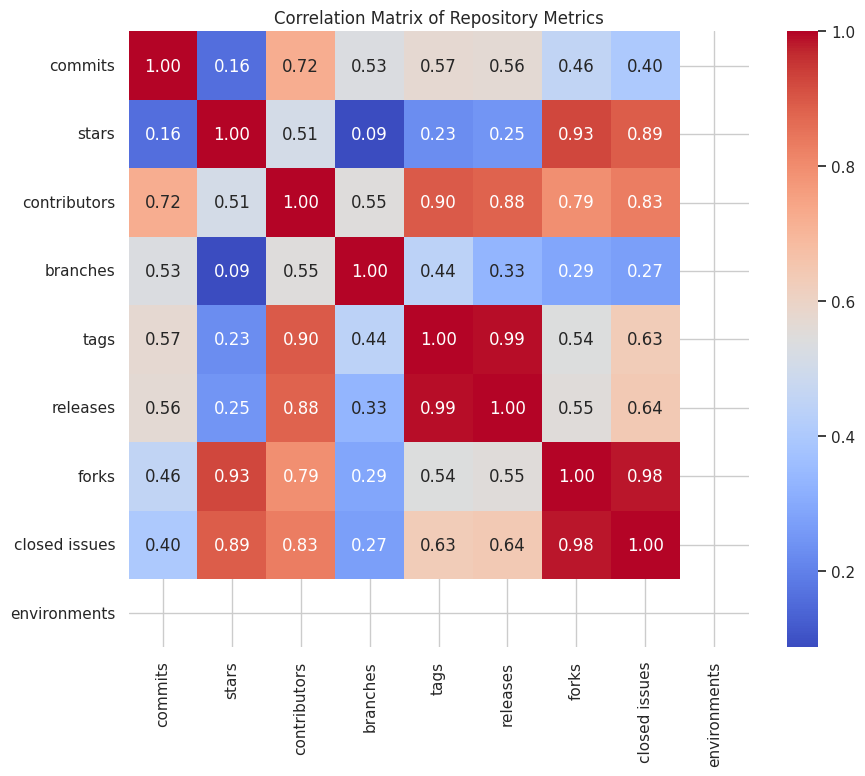

In [5]:
# Compute and display a correlation matrix to see relationships between metrics
corr_matrix = df_metrics.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Repository Metrics")
plt.show()

# High Correlation Relationship
- Stars and Forks: with a correlation metric of 0.93. Indicating a strong linear relationship between the two. A repository with a high number of stars will also have many forks. This is pretty intuitive, a repository that is starred meaning lots of people like it, also tend to attract people who would like to modify and build upon that same codebase.

In [ ]:
# Let's rank the repositories by the number of stars
ranking = df_metrics.sort_values(by="stars", ascending=False)
print("Top 5 Repositories by Stars:")
print(ranking.head(5))

Top 5 Repositories by Stars:
                     commits  stars  contributors  branches  tags  releases  \
repository                                                                    
kaggle-api               238   6482            45        10     8         8   
docker-python           2430   2516           139        47   247       192   
learntools              2649    465            32        36     2         0   
kaggle-environments      528    318            32        75    43         6   
kagglehub                184    184            16        35    33        26   

                     forks  closed issues  environments  
repository                                               
kaggle-api            1130            349             0  
docker-python          971            353             0  
learntools             251             15             0  
kaggle-environments    156             46             0  
kagglehub               37             10             0  
